In [1]:
#Wine Quality Prediction System..

In [2]:
!wget winequality-white.csv https://raw.githubusercontent.com/sagarmokashi1995/DS_sets/master/winequality-white.csv

--2019-11-08 17:47:31--  http://winequality-white.csv/
Resolving winequality-white.csv (winequality-white.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘winequality-white.csv’
--2019-11-08 17:47:31--  https://raw.githubusercontent.com/sagarmokashi1995/DS_sets/master/winequality-white.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/plain]
Saving to: ‘winequality-white.csv.2’

100%[======================================>] 264,426     --.-K/s   in 0.02s   

2019-11-08 17:47:32 (16.6 MB/s) - ‘winequality-white.csv.2’ saved [264426/264426]

FINISHED --2019-11-08 17:47:32--
Total wall clock time: 0.2s
Downloaded: 1 files, 258K in 0.02s (16.6 MB/s)


In [38]:

#Data processing, data visualization and linear algebra
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
import seaborn as sns

#Algorithms
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

#Accuracy
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score


In [39]:

missing_data = ["na","--"," ","?"]
df=pd.read_csv("winequality-white.csv", sep=';',na_values = missing_data)


In [40]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [43]:
missing_data = df.isnull()
missing_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
col_names = df.columns.values.tolist()
for column in col_names:
    print(column)
    print(missing_data[column].value_counts())
    print("")

fixed acidity
False    4898
Name: fixed acidity, dtype: int64

volatile acidity
False    4898
Name: volatile acidity, dtype: int64

citric acid
False    4898
Name: citric acid, dtype: int64

residual sugar
False    4898
Name: residual sugar, dtype: int64

chlorides
False    4898
Name: chlorides, dtype: int64

free sulfur dioxide
False    4898
Name: free sulfur dioxide, dtype: int64

total sulfur dioxide
False    4898
Name: total sulfur dioxide, dtype: int64

density
False    4898
Name: density, dtype: int64

pH
False    4898
Name: pH, dtype: int64

sulphates
False    4898
Name: sulphates, dtype: int64

alcohol
False    4898
Name: alcohol, dtype: int64

quality
False    4898
Name: quality, dtype: int64



In [45]:
#applying Linear Regression to compare alcohol % in wine over quality of the white wine

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
regressor=linear_model.LinearRegression()

In [47]:
X=df[["alcohol"]]
Y=df[["quality"]]

x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=4) #train and test splitiing
print('Train Set', x_train.shape, y_train.shape)
print('Test Set', x_test.shape, y_test.shape)

Train Set (3918, 1) (3918, 1)
Test Set (980, 1) (980, 1)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
regressor.fit(x_train,y_train)#fitting data on train data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
#prediction on x test data
y_pred=regressor.predict(x_test)
y_pred

array([[5.46723462],
       [5.46723462],
       [6.11681532],
       [6.08588291],
       [5.6528291 ],
       [5.68376152],
       [6.4880043 ],
       [5.59096427],
       [5.46723462],
       [6.36427464],
       [5.40536979],
       [5.52909944],
       [6.02401808],
       [5.52909944],
       [5.40536979],
       [5.52909944],
       [6.39520705],
       [5.40536979],
       [6.58080154],
       [5.56003186],
       [5.77655876],
       [6.14774774],
       [6.54986913],
       [5.6528291 ],
       [5.46723462],
       [6.11681532],
       [5.68376152],
       [6.24054498],
       [5.6528291 ],
       [6.02401808],
       [6.08588291],
       [5.6528291 ],
       [5.77655876],
       [5.40536979],
       [6.58080154],
       [5.68376152],
       [5.74562635],
       [6.05495049],
       [5.59096427],
       [6.08588291],
       [6.33334222],
       [5.40536979],
       [5.83842359],
       [5.71469393],
       [6.02401808],
       [5.46723462],
       [5.49816703],
       [6.426

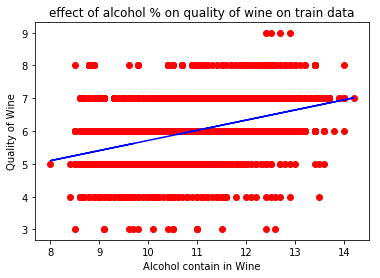

In [52]:
#plotting a scatter plot against the x train and y train data
plt.scatter(x_train, y_train,  color='red')# prediction on test set and visualization on train set
plt.plot(x_train,regressor.predict(x_train),color='blue')
#plt.plot(x_train,y_pred,color='blue')
plt.title("effect of alcohol % on quality of wine on train data")
plt.xlabel("Alcohol contain in Wine")
plt.ylabel("Quality of Wine")
plt.show()

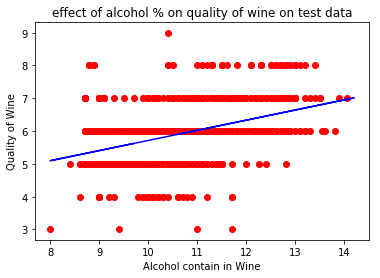

In [53]:
plt.scatter(x_test, y_test,  color='red')#final output will be on test data
plt.plot(x_train,regressor.predict(x_train),color='blue')
#plt.plot(x_train,y_pred,color='blue')
plt.title("effect of alcohol % on quality of wine on test data")
plt.xlabel("Alcohol contain in Wine")
plt.ylabel("Quality of Wine")
plt.show()

In [54]:
#finding the accuracy of the model
accuracy=regressor.score(y_pred,y_test)
accuracy

-2.545273421437651

-2.545273421437651

In [55]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test))#finding accuracy of the algo

Mean absolute error: 0.63
Residual sum of squares (MSE): 0.63
R2-score: -3.29


In [100]:
##Hence we can conclude that Linear Regression is not giving the upto the mark prediction and accuracy for the problem statement "alchocol % effect on quality of wine"

In [3]:
## Wine quality based on the KNN algorithm

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter

In [57]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Text(0.5, 1.0, 'Histogram of Alcohol % in wine ')

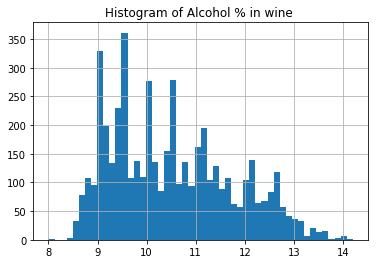

In [58]:
df.hist(column='alcohol', bins=50)
plt.title("Histogram of Alcohol % in wine ")

In [59]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [60]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values

X[0:5]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00]])

In [61]:
Y=df[['quality']].values

Y[0:14]

array([[6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [5],
       [7]])

In [62]:
df.shape

(4898, 12)

In [64]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float)) ### doing standard scaling : formula=(x-mean)/std dev

In [65]:
X[0:5]

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01,
         2.82134917e+00, -3.53550004e-02,  5.69931577e-01,
         7.44565035e-01,  2.33151201e+00, -1.24692128e+00,
        -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02,
        -9.44765273e-01,  1.47747079e-01, -1.25301866e+00,
        -1.49684624e-01, -9.15417164e-03,  7.40028640e-01,
         1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01,
         1.00282190e-01,  1.93522599e-01, -3.12141119e-01,
        -9.73335626e-01,  3.58664800e-01,  4.75101984e-01,
        -4.36815783e-01, -3.36667007e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
         1.12109121e+00,  5.25855242e-01,  1.14803354e-02,
        -7.87341887e-01, -4.99203231e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
  

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print("Train set:",x_train.shape,y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (3918, 11) (3918, 1)
Test set: (980, 11) (980, 1)


In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
k=7
neig=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neig

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [70]:
ypred=neig.predict(x_test)
ypred[0:5]

array([8, 5, 6, 6, 5])

In [71]:
xpred=neig.predict(x_train)
xpred[0:5]

array([6, 6, 5, 6, 5])

In [72]:
print("Train set Accuracy",metrics.accuracy_score(y_train,xpred))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ypred))

Train set Accuracy 0.6659009698825932
Test set Accuracy:  0.5377551020408163


In [38]:
#testing accuracy of the model from k=1 to k=10

In [73]:
k=10

accuracy=[]

for n in range(1,10):
    neigh=KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    ypred=neigh.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,ypred))
    
accuracy

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/_

[0.6438775510204081,
 0.5724489795918367,
 0.563265306122449,
 0.5408163265306123,
 0.5418367346938775,
 0.5469387755102041,
 0.5377551020408163,
 0.5244897959183673,
 0.5295918367346939]

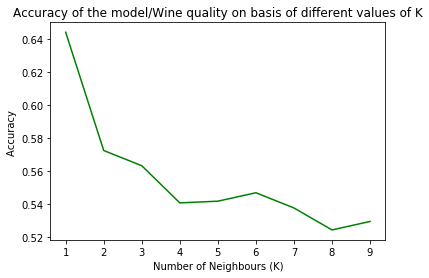

In [74]:
plt.plot(range(1,k),accuracy,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.title("Accuracy of the model/Wine quality on basis of different values of K")
plt.show()

In [75]:
print( "The best accuracy was with", max(accuracy), "with k=", accuracy.index(max(accuracy))+1)

The best accuracy was with 0.6438775510204081 with k= 1


In [55]:
#Therefore as per the model, when k=1 is giving highest accuracy 0.6438, but as per our assumption of k=7 giving accuracy of 0.5377

In [8]:
##Wine quality system using Decision tree algorithm

In [76]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [77]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values

X[0:5]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00]])

In [78]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float)) ### doing standard scaling : formula=(x-mean)/std dev
X[0:5]

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01,
         2.82134917e+00, -3.53550004e-02,  5.69931577e-01,
         7.44565035e-01,  2.33151201e+00, -1.24692128e+00,
        -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02,
        -9.44765273e-01,  1.47747079e-01, -1.25301866e+00,
        -1.49684624e-01, -9.15417164e-03,  7.40028640e-01,
         1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01,
         1.00282190e-01,  1.93522599e-01, -3.12141119e-01,
        -9.73335626e-01,  3.58664800e-01,  4.75101984e-01,
        -4.36815783e-01, -3.36667007e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
         1.12109121e+00,  5.25855242e-01,  1.14803354e-02,
        -7.87341887e-01, -4.99203231e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
  

In [79]:
Y=df[['quality']].values
Y[0:14]

array([[6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [5],
       [7]])

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print("Train set:",x_train.shape,y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (3428, 11) (3428, 1)
Test set: (1470, 11) (1470, 1)


In [81]:
wineTree = DecisionTreeClassifier(criterion='entropy')
wineTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
wineTree.fit(x_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
predWine=wineTree.predict(x_test)
predWine

array([6, 5, 6, ..., 6, 6, 7])

In [84]:
print(predWine[0:5])
print(y_test[0:5])

[6 5 6 6 5]
[[6]
 [5]
 [6]
 [6]
 [5]]


In [85]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Trees's Accuracy for Wine Quality: ", metrics.accuracy_score(y_test, predWine))

Decision Trees's Accuracy for Wine Quality:  1.0


In [86]:
## Hence we could see that Decison Tree is providing 100% accuracy for wine quality system

In [ ]:
##depicting total alcohol content based on the quality rate of wine in way of pie chart

In [87]:
df_quality=df['quality'].value_counts()
df_quality

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

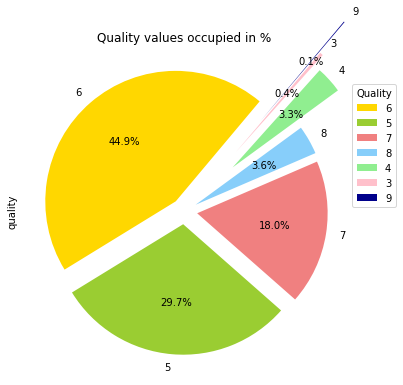

Where 6, 5, 7, 8, 4, 3, 9 are the wine quality values


In [88]:
plt.title("Quality values occupied in %")
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','darkblue']
explode_list = [0.1, 0.1, 0.1, 0.1, 0.5, 0.6, 0.9] 
quality_label =["Wine quality","Wine quality","Wine quality","Wine quality","Wine quality","Wine quality","Wine quality"]

df_quality.plot(kind='pie',
                            figsize=(6, 6),
                            autopct='%1.1f%%', 
                            startangle=50,    
                            shadow=False,       
                            colors=colors_list,  # add custom colors
                            explode=explode_list  
                            )

plt.legend(title="Quality",
          loc="center left",
          bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.show()

print("Where 6, 5, 7, 8, 4, 3, 9 are the wine quality values")

In [4]:
#wine prediction using naive bayes algo

In [89]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values

X[0:5]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00]])

In [90]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float)) ### doing standard scaling : formula=(x-mean)/std dev
X[0:5]

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01,
         2.82134917e+00, -3.53550004e-02,  5.69931577e-01,
         7.44565035e-01,  2.33151201e+00, -1.24692128e+00,
        -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02,
        -9.44765273e-01,  1.47747079e-01, -1.25301866e+00,
        -1.49684624e-01, -9.15417164e-03,  7.40028640e-01,
         1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01,
         1.00282190e-01,  1.93522599e-01, -3.12141119e-01,
        -9.73335626e-01,  3.58664800e-01,  4.75101984e-01,
        -4.36815783e-01, -3.36667007e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
         1.12109121e+00,  5.25855242e-01,  1.14803354e-02,
        -7.87341887e-01, -4.99203231e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
  

In [91]:
Y=df[['quality']].values

Y[0:14]

array([[6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [5],
       [7]])

In [92]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
  
print("Size of X data set",x_train.shape,x_test.shape)
print("Size of Y data set",y_train.shape,y_test.shape)
from sklearn.naive_bayes import GaussianNB

Size of X data set (3428, 11) (1470, 11)
Size of Y data set (3428, 1) (1470, 1)


In [93]:
gnb = GaussianNB() 
gnb.fit(x_train, y_train) #fittimg data

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [94]:
y_pred = gnb.predict(x_test)
y_pred[0:14]

array([5, 5, 7, 5, 7, 6, 5, 4, 6, 5, 7, 6, 7, 5])

In [95]:
print(y_pred[0:5])
print(y_test[0:5])

[5 5 7 5 7]
[[4]
 [6]
 [7]
 [5]
 [7]]


In [96]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.4523809523809524


In [4]:
## Naive bayes is not giving the proper and expected accuracy for wine quality prediction 

In [5]:
##wine quality prediction using Random Forest algo

In [97]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
  
print("Size of X data set",x_train.shape,x_test.shape)
print("Size of Y data set",y_train.shape,y_test.shape)

Size of X data set (3428, 11) (1470, 11)
Size of Y data set (3428, 1) (1470, 1)


In [98]:
wine=RandomForestClassifier(n_estimators=50)
wine.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
y_pred=wine.predict(x_test)
y_pred

array([5, 5, 7, ..., 6, 6, 6])

In [102]:
print("Accuracy of Random Forest Algorithm is:",metrics.accuracy_score(y_test,y_pred))

Accuracy of Random Forest Algorithm is: 0.6748299319727891


In [29]:
##Hence Random forest is giving average accuracy for wine quality system

In [25]:
##plotting boxplot for each wine quality value between 1-10

<Figure size 7200x3600 with 0 Axes>

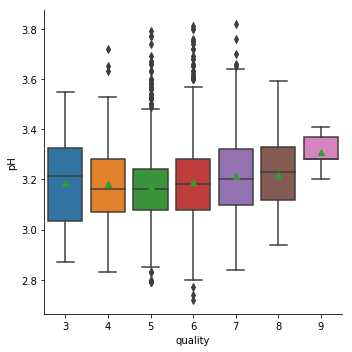

In [49]:
plt.figure(figsize=(100,50))
sns.catplot(x="quality",y="pH",data=df,kind='box',showmeans=True)

In [26]:
##Wine Prediction system using Logistic regression

In [103]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values

X[0:5]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00]])

In [104]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float)) ### doing standard scaling : formula=(x-mean)/std dev
X[0:5]

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01,
         2.82134917e+00, -3.53550004e-02,  5.69931577e-01,
         7.44565035e-01,  2.33151201e+00, -1.24692128e+00,
        -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02,
        -9.44765273e-01,  1.47747079e-01, -1.25301866e+00,
        -1.49684624e-01, -9.15417164e-03,  7.40028640e-01,
         1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01,
         1.00282190e-01,  1.93522599e-01, -3.12141119e-01,
        -9.73335626e-01,  3.58664800e-01,  4.75101984e-01,
        -4.36815783e-01, -3.36667007e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
         1.12109121e+00,  5.25855242e-01,  1.14803354e-02,
        -7.87341887e-01, -4.99203231e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
  

In [105]:
Y=df[['quality']].values

Y[0:14]

array([[6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [5],
       [7]])

In [106]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
  
print("Size of X data set",x_train.shape,x_test.shape)
print("Size of Y data set",y_train.shape,y_test.shape)

Size of X data set (3428, 11) (1470, 11)
Size of Y data set (3428, 1) (1470, 1)


In [107]:
from sklearn.linear_model import LogisticRegression
wineLR=LogisticRegression(C=0.01,solver='liblinear')
wineLR.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
ypred=wineLR.predict(x_test)
ypred

array([5, 5, 6, ..., 6, 6, 6])

In [109]:
print("Accuracy score of Logistic Regression using metrics:",metrics.accuracy_score(y_test,ypred))

Accuracy score of Logistic Regression using metrics: 0.5224489795918368


In [110]:
from sklearn.metrics import jaccard_similarity_score
print("Accuracy score of Logistic Regression using Jaccard similarity:",jaccard_similarity_score(y_test, ypred))

Accuracy score of Logistic Regression using Jaccard similarity: 0.5224489795918368


In [24]:
##Hence we could see that logistic Regression is providing us the average accuracy for Wine Quality system

In [5]:
##medium article... search on internet... twitter sentiment analysis
##add label to visualizations

In [6]:
## wine quality prediction using Support vector machine(SVM)

In [15]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values

X[0:5]

array([[7.00e+00, 2.70e-01, 3.60e-01, 2.07e+01, 4.50e-02, 4.50e+01,
        1.70e+02, 1.00e+00, 3.00e+00, 4.50e-01, 8.80e+00],
       [6.30e+00, 3.00e-01, 3.40e-01, 1.60e+00, 4.90e-02, 1.40e+01,
        1.32e+02, 9.94e-01, 3.30e+00, 4.90e-01, 9.50e+00],
       [8.10e+00, 2.80e-01, 4.00e-01, 6.90e+00, 5.00e-02, 3.00e+01,
        9.70e+01, 9.95e-01, 3.26e+00, 4.40e-01, 1.01e+01],
       [7.20e+00, 2.30e-01, 3.20e-01, 8.50e+00, 5.80e-02, 4.70e+01,
        1.86e+02, 9.96e-01, 3.19e+00, 4.00e-01, 9.90e+00],
       [7.20e+00, 2.30e-01, 3.20e-01, 8.50e+00, 5.80e-02, 4.70e+01,
        1.86e+02, 9.96e-01, 3.19e+00, 4.00e-01, 9.90e+00]])

In [16]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float)) ### doing standard scaling : formula=(x-mean)/std dev
X[0:5]

array([[ 1.72e-01, -8.18e-02,  2.13e-01,  2.82e+00, -3.54e-02,  5.70e-01,
         7.45e-01,  2.33e+00, -1.25e+00, -3.49e-01, -1.39e+00],
       [-6.58e-01,  2.16e-01,  4.80e-02, -9.45e-01,  1.48e-01, -1.25e+00,
        -1.50e-01, -9.15e-03,  7.40e-01,  1.34e-03, -8.24e-01],
       [ 1.48e+00,  1.75e-02,  5.44e-01,  1.00e-01,  1.94e-01, -3.12e-01,
        -9.73e-01,  3.59e-01,  4.75e-01, -4.37e-01, -3.37e-01],
       [ 4.09e-01, -4.79e-01, -1.17e-01,  4.16e-01,  5.60e-01,  6.88e-01,
         1.12e+00,  5.26e-01,  1.15e-02, -7.87e-01, -4.99e-01],
       [ 4.09e-01, -4.79e-01, -1.17e-01,  4.16e-01,  5.60e-01,  6.88e-01,
         1.12e+00,  5.26e-01,  1.15e-02, -7.87e-01, -4.99e-01]])

In [17]:
Y=df[['quality']].values

Y[0:14]

array([[6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [5],
       [7]])

In [19]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1) 
  
print("Size of X data set",x_train.shape,x_test.shape)
print("Size of Y data set",y_train.shape,y_test.shape)

Size of X data set (3673, 11) (1225, 11)
Size of Y data set (3673, 1) (1225, 1)


In [21]:
svm_qual=svm.SVC(kernel="rbf")
svm_qual.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
ypred_qual=svm_qual.predict(x_test)
ypred_qual

array([5, 5, 6, ..., 6, 6, 6])

In [26]:
#print("Accuracy score of SVM is:",metrics.accuracy_score(y_test,ypred_qual))
#from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,ypred_qual)*100

55.51020408163265

In [130]:
##Hence we could see that SVM is providing average accuracy for Wine prediction system

In [ ]:
    Below are the algorithms we used with their accuracy for Wine Quality Detection System:
        1. Linear Regression : -2.545273421437651(-254.5%)
        2. KNN : 0.5377551020408163(53.775%)
        3. Decision Tree : 1.0(100%)
        4. Naive Bayes : 0.4523809523809524(45.238%)
        5. Random Forest : 0.6748299319727891(67.482%)
        6. Logistic Regression : 0.52244897959183675(52.244%)
        7. SVM : 0.5551020408163265(55.51%)
    
    After comparing multiple algorithms and finding their accuracy for Wine quality system we can conclude that 
    Decision Tree is giving highest accuracy for the model which is 1.0(100%) 
    and on the other hand Linear regression is fiving worst accuracy for the model which is in negative(-2.54).